## Markov Chain Analysis for Estimating Doubtful Accounts in Retail

In [5]:
import numpy as np
import pandas as pd

# Define the transition matrix P (8x8 matrix including absorbing states)
P = np.array([
    [1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],  # Paid (absorbing)
    [0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],  # Bad Debt (absorbing)
    [0.21, 0.00, 0.67, 0.12, 0.00, 0.00, 0.00, 0.00],  # Current
    [0.13, 0.00, 0.19, 0.44, 0.24, 0.00, 0.00, 0.00],  # 1 month overdue
    [0.13, 0.00, 0.08, 0.20, 0.36, 0.23, 0.00, 0.00],  # 2 months overdue
    [0.10, 0.00, 0.01, 0.04, 0.17, 0.29, 0.39, 0.00],  # 3 months overdue
    [0.14, 0.00, 0.02, 0.09, 0.20, 0.41, 0.14, 0.00],  # 4 months overdue
    [0.09, 0.18, 0.01, 0.02, 0.01, 0.10, 0.12, 0.47]   # 5 months overdue
])

# Extract transient matrix Q (excluding absorbing states)
Q = P[2:, 2:]  # Correctly extracts the 6x6 transient matrix

# Compute the Fundamental Matrix N = (I - Q)^(-1)
I = np.eye(Q.shape[0])  # Identity matrix of same size as Q (6x6)
N = np.linalg.inv(I - Q)  # Fundamental matrix (6x6)

# Extract R (transition from transient states to absorbing states)
R = P[2:, :2]  # First two columns of non-absorbing states (6x2)

# Compute Absorbing Probabilities Matrix: B = N * R
B = N @ R  # B gives probability of absorption into each absorbing state (6x2)

# Example: Initial dollar amount in each delinquency category
b = np.array([50000, 30000, 20000, 10000, 5000, 2000])  # Total receivables per state

# Compute Expected Paid and Bad Debt Amounts
expected_amounts = b @ B  # Dot product: (1x6) * (6x2) = (1x2)

# Create DataFrames for better visualization
df_Q = pd.DataFrame(Q, columns=[f"State {i}" for i in range(2, 8)], index=[f"State {i}" for i in range(2, 8)])
df_R = pd.DataFrame(R, columns=["Paid", "Bad Debt"], index=[f"State {i}" for i in range(2, 8)])
df_N = pd.DataFrame(N, columns=[f"State {i}" for i in range(2, 8)], index=[f"State {i}" for i in range(2, 8)])
df_B = pd.DataFrame(B, columns=["Paid", "Bad Debt"], index=[f"State {i}" for i in range(2, 8)])
df_results = pd.DataFrame({
    "State": ["Paid", "Bad Debt"],
    "Expected Amount": expected_amounts
})

# Print all matrices
print("\nTransient State Matrix (Q):")
print(df_Q)

print("\nAbsorbing Transition Matrix (R):")
print(df_R)

print("\nFundamental Matrix (N):")
print(df_N)

print("\nAbsorbing Probability Matrix (B):")
print(df_B)

print("\nFinal Expected Amounts:")
print(df_results)



Transient State Matrix (Q):
         State 2  State 3  State 4  State 5  State 6  State 7
State 2     0.67     0.12     0.00     0.00     0.00     0.00
State 3     0.19     0.44     0.24     0.00     0.00     0.00
State 4     0.08     0.20     0.36     0.23     0.00     0.00
State 5     0.01     0.04     0.17     0.29     0.39     0.00
State 6     0.02     0.09     0.20     0.41     0.14     0.00
State 7     0.01     0.02     0.01     0.10     0.12     0.47

Absorbing Transition Matrix (R):
         Paid  Bad Debt
State 2  0.21      0.00
State 3  0.13      0.00
State 4  0.13      0.00
State 5  0.10      0.00
State 6  0.14      0.00
State 7  0.09      0.18

Fundamental Matrix (N):
          State 2   State 3   State 4   State 5   State 6   State 7
State 2  3.718728  0.986230  0.450344  0.197644  0.089629  0.000000
State 3  1.893169  2.712132  1.238447  0.543521  0.246480  0.000000
State 4  1.473400  1.380875  2.533188  1.111747  0.504164  0.000000
State 5  1.160192  1.141024  1.467491 

## Graph Visualization

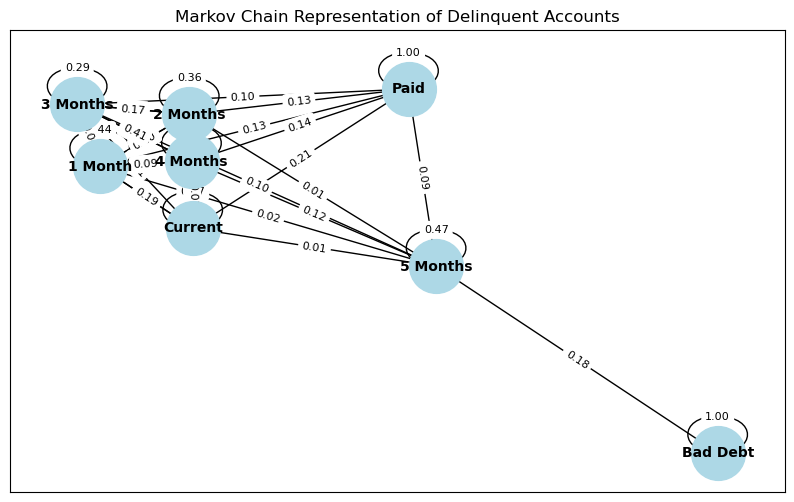

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

# State labels
states = ["Paid", "Bad Debt", "Current", "1 Month", "2 Months", "3 Months", "4 Months", "5 Months"]

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for state in states:
    G.add_node(state)

# Add weighted edges based on transition probabilities
for i in range(len(states)):
    for j in range(len(states)):
        if P[i, j] > 0:  # Only add edges for nonzero probabilities
            G.add_edge(states[i], states[j], weight=P[i, j])

# Draw the Markov Chain Graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # Position nodes for visualization
edges = G.edges(data=True)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1500)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

# Draw edges with weights
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=15, edge_color="black")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Markov Chain Representation of Delinquent Accounts")
plt.show()